# __Carga de sistemas pre-entrenados en Keras__

### Ajustar los datos de entrada al modelo seleccionado

Vamos a trabajar con las imagenes de que tenemos precargadas en local.

In [2]:
# librerias
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf

from tensorflow.keras import regularizers

# libreria para trabajar con las bases de datos 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Vamos a usar la arquitectura inception V3 que podrás encontrar en la documentación de Keras, puedes notar que sus dimensiones de entrada son (150, 150, 3) y nuestras imágenes son (28, 28, 1), por lo que debemos cambiar su tamaño y escala de colores (escalar imágenes hacia arriba no es recomendable dada la pérdida de información, por lo que siempre deberías buscar un modelo que se adapte a las dimensiones de tu dataset).

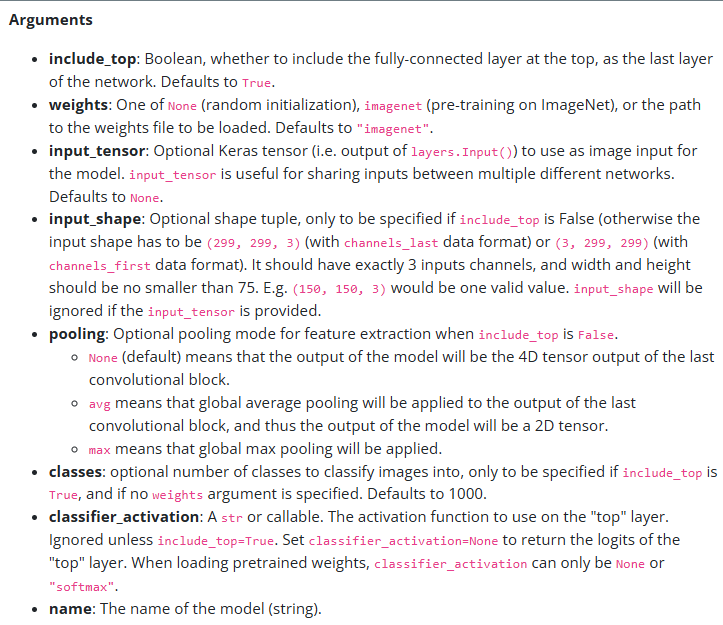

Por tanto, creamos nuevos data generators, donde modificamos el target size y el color mode. Esto será aplicado a los 3 generadores.

In [3]:
# ruta de los archivos
train_dir = './sign-language-img/Train'
test_dir = './sign-language-img/Test'

# data generator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# generator para test, training y validation adaptados al modelo
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training'
)

# para datos de validacion
validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation'
)

# para datos de prueba
test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'rgb'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


Ahora que los datos de entrada son compatibles, podremos importar la configuración desde Keras.

### Cargar modelo desde Keras

In [ ]:
# importar modelo
from tensorflow.keras.applications.inception_v3 import InceptionV3

Cargamos el modelo en la variable pre_trained_model que será una instancia de la clase InceptionV3, esta tendrá como parámetros un include_top a falso y el tensor de entrada que será de 150x150x3

In [6]:
pre_trained_model = InceptionV3(
    include_top=False,
    input_tensor = tf.keras.layers.Input(shape=(150,150,3))
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Desactivamos el entrenamiento de cada capa dado que poseemos la configuracion optima.

In [7]:
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 74, 74,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation_5[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_6[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 35, 35,    │          0 │ activation_7[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d_2[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_8[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

Si vemos la configuración del modelo obtendremos una lista gigantesca de capas, pero si nos concentramos en el final, nos encontraremos con casi 22 millones de parámetros

Para la configuración de InceptionV3 encontramos capas con configuraciones no secuenciales, estas serán sincronizadas en la capa mixed, donde se aplica todo el proceso de pooling y batch normalization.

Elegiremos una de estas capas mixed para cortar la arquitectura y agregar nuestros output, en esta ocasión elegiremos mixed7.

In [8]:
last_layers = pre_trained_model.get_layer('mixed7')
last_output = last_layers.output